# 1. 필요한 라이브러리 import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 2. 데이터 생성

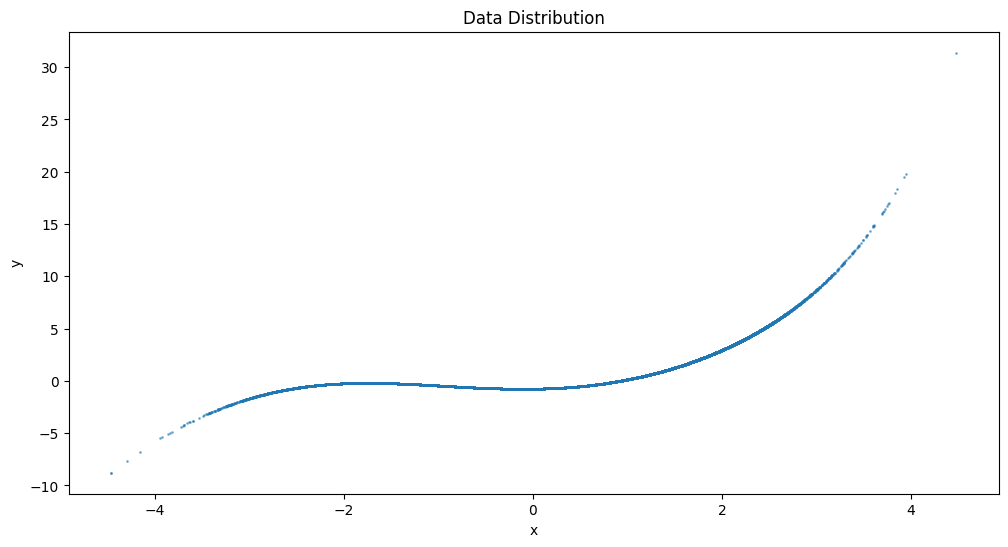

In [2]:
# Gaussian 분포를 따르는 랜덤 data 100000개 생성
np.random.seed(42)
x = np.random.normal(loc=0, scale=1, size=100000)
y = (1/4) * np.exp(x) - (1/8) * np.sin(x) - np.cos(x) + 0.1 * x**3

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

plt.figure(figsize=(12, 6))
plt.scatter(x, y, s=1, label="True Data", alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data Distribution")
plt.show()

# 3. N차 비선형 회귀분석 수행 (No Regularization)

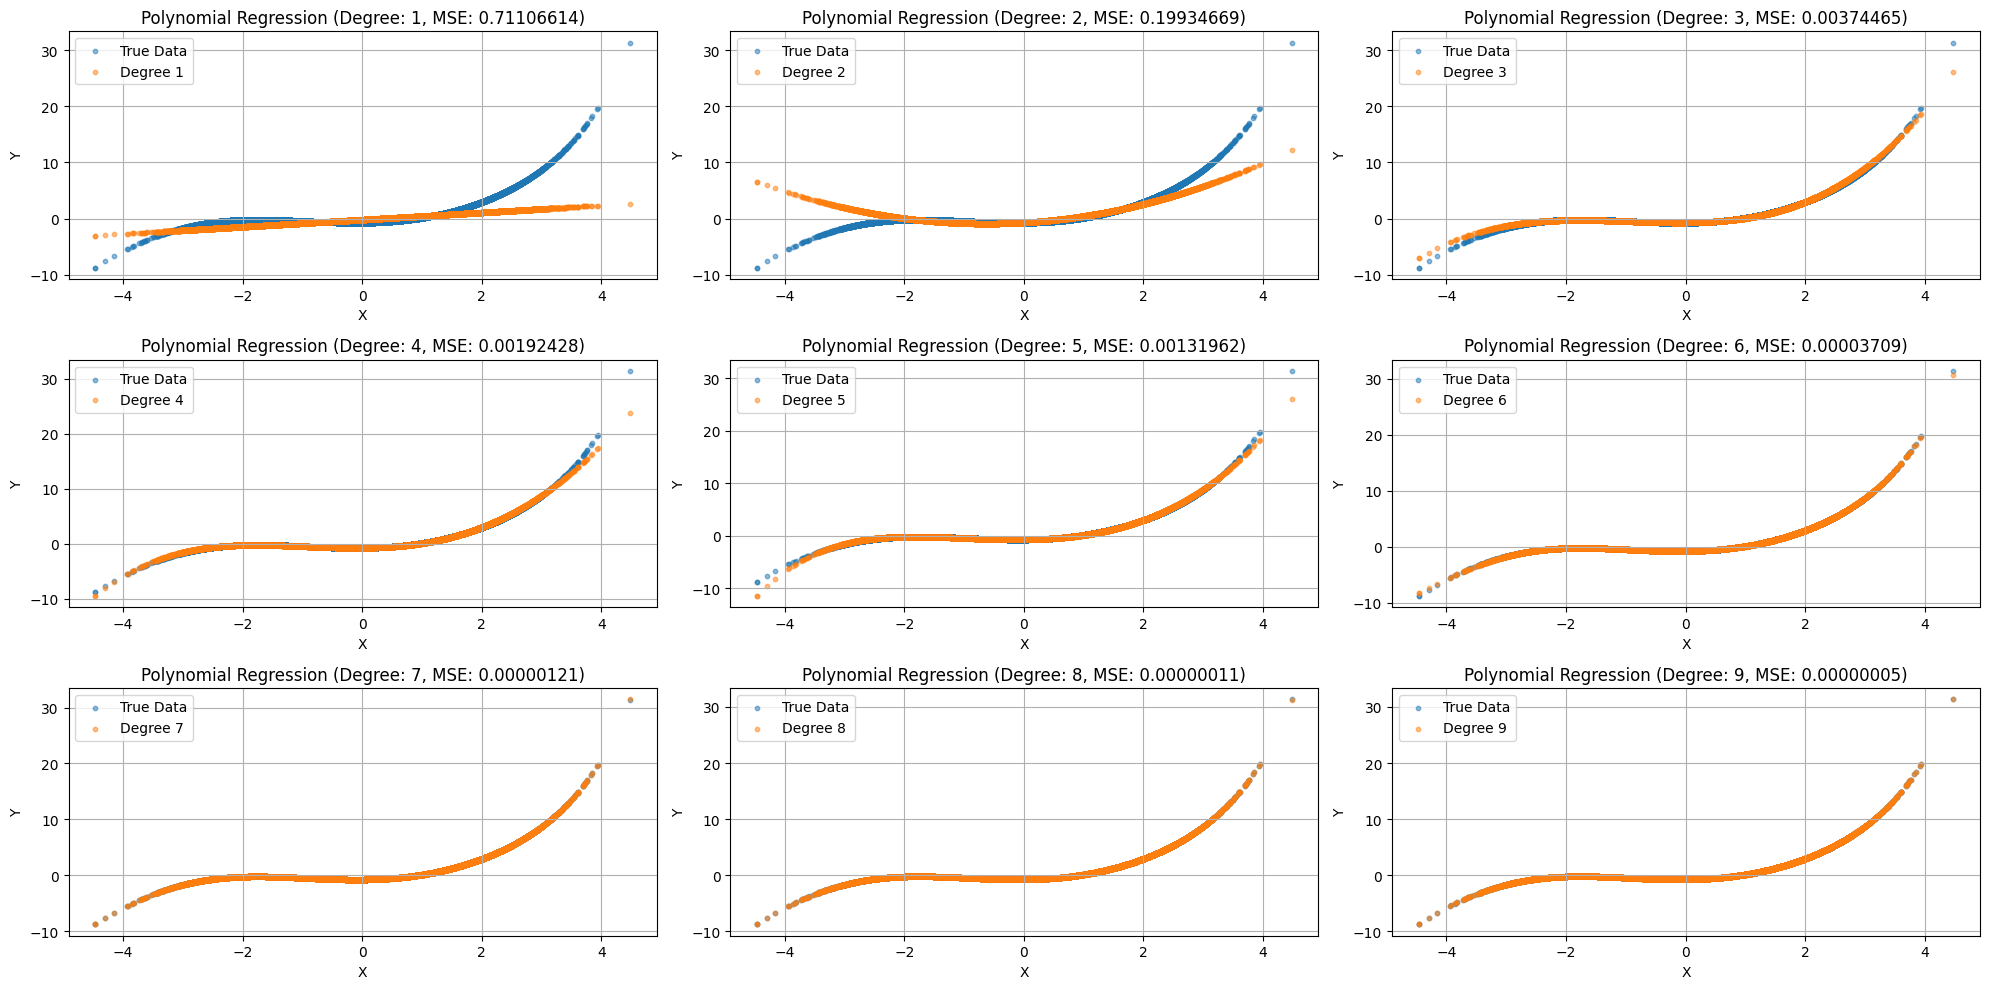

In [6]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
axes = axes.flatten()

for idx, poly_degree in enumerate(range(1, 10)):
  poly_reg = make_pipeline(PolynomialFeatures(degree=poly_degree), LinearRegression())
  poly_reg.fit(x, y)

  y_pred = poly_reg.predict(x)
  error = np.mean((y - y_pred) ** 2)

  ax = axes[idx]
  ax.scatter(x, y, s=10, label="True Data", alpha=0.5)
  ax.scatter(x, y_pred, s=10, label=f"Degree {poly_degree}", alpha=0.5)
  ax.set_title(f"Polynomial Regression (Degree: {poly_degree}, MSE: {error:.8f})")
  ax.set_xlabel("X")
  ax.set_ylabel("Y")
  ax.legend()
  ax.grid(True)

plt.tight_layout()
plt.show()

In [12]:
poly_degree = 9

# 4. L1 Regularization (Lasso Regression) 적용한 회귀분석 수행

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


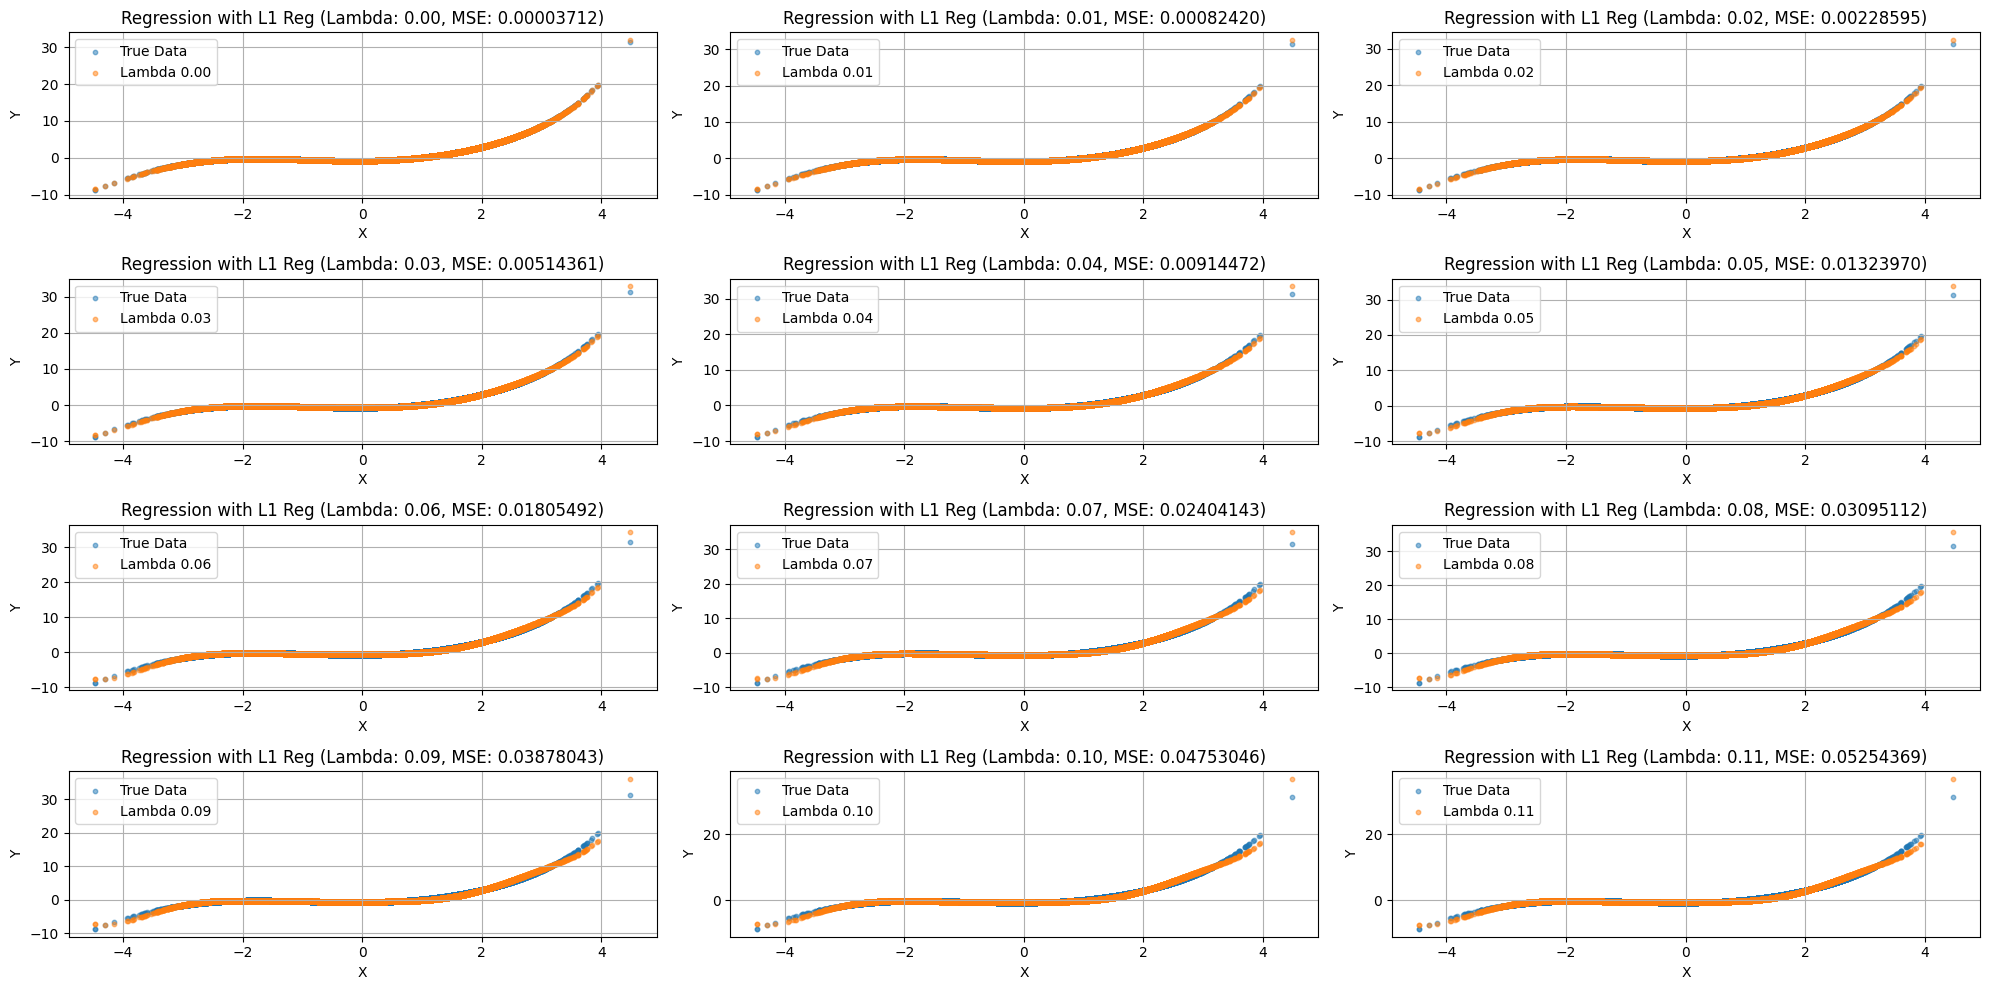

In [13]:
fig, axes = plt.subplots(4, 3, figsize=(20, 10))
axes = axes.flatten()

for idx, lam in enumerate(range(0, 12)):
    lam = 0.01 * lam
    lasso_reg = make_pipeline(PolynomialFeatures(degree=poly_degree), Lasso(alpha=lam, max_iter=10000))
    lasso_reg.fit(x, y)

    y_lasso = lasso_reg.predict(x)
    error = np.mean((y.ravel() - y_lasso) ** 2)

    ax = axes[idx]
    ax.scatter(x, y, s=10, label="True Data", alpha=0.5)
    ax.scatter(x, y_lasso, s=10, label=f"Lambda {lam:.2f}", alpha=0.5)
    ax.set_title(f"Regression with L1 Reg (Lambda: {lam:.2f}, MSE: {error:.8f})")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

# 5. L2 Regularization (Ridge Regression) 적용한 회귀분석 수행

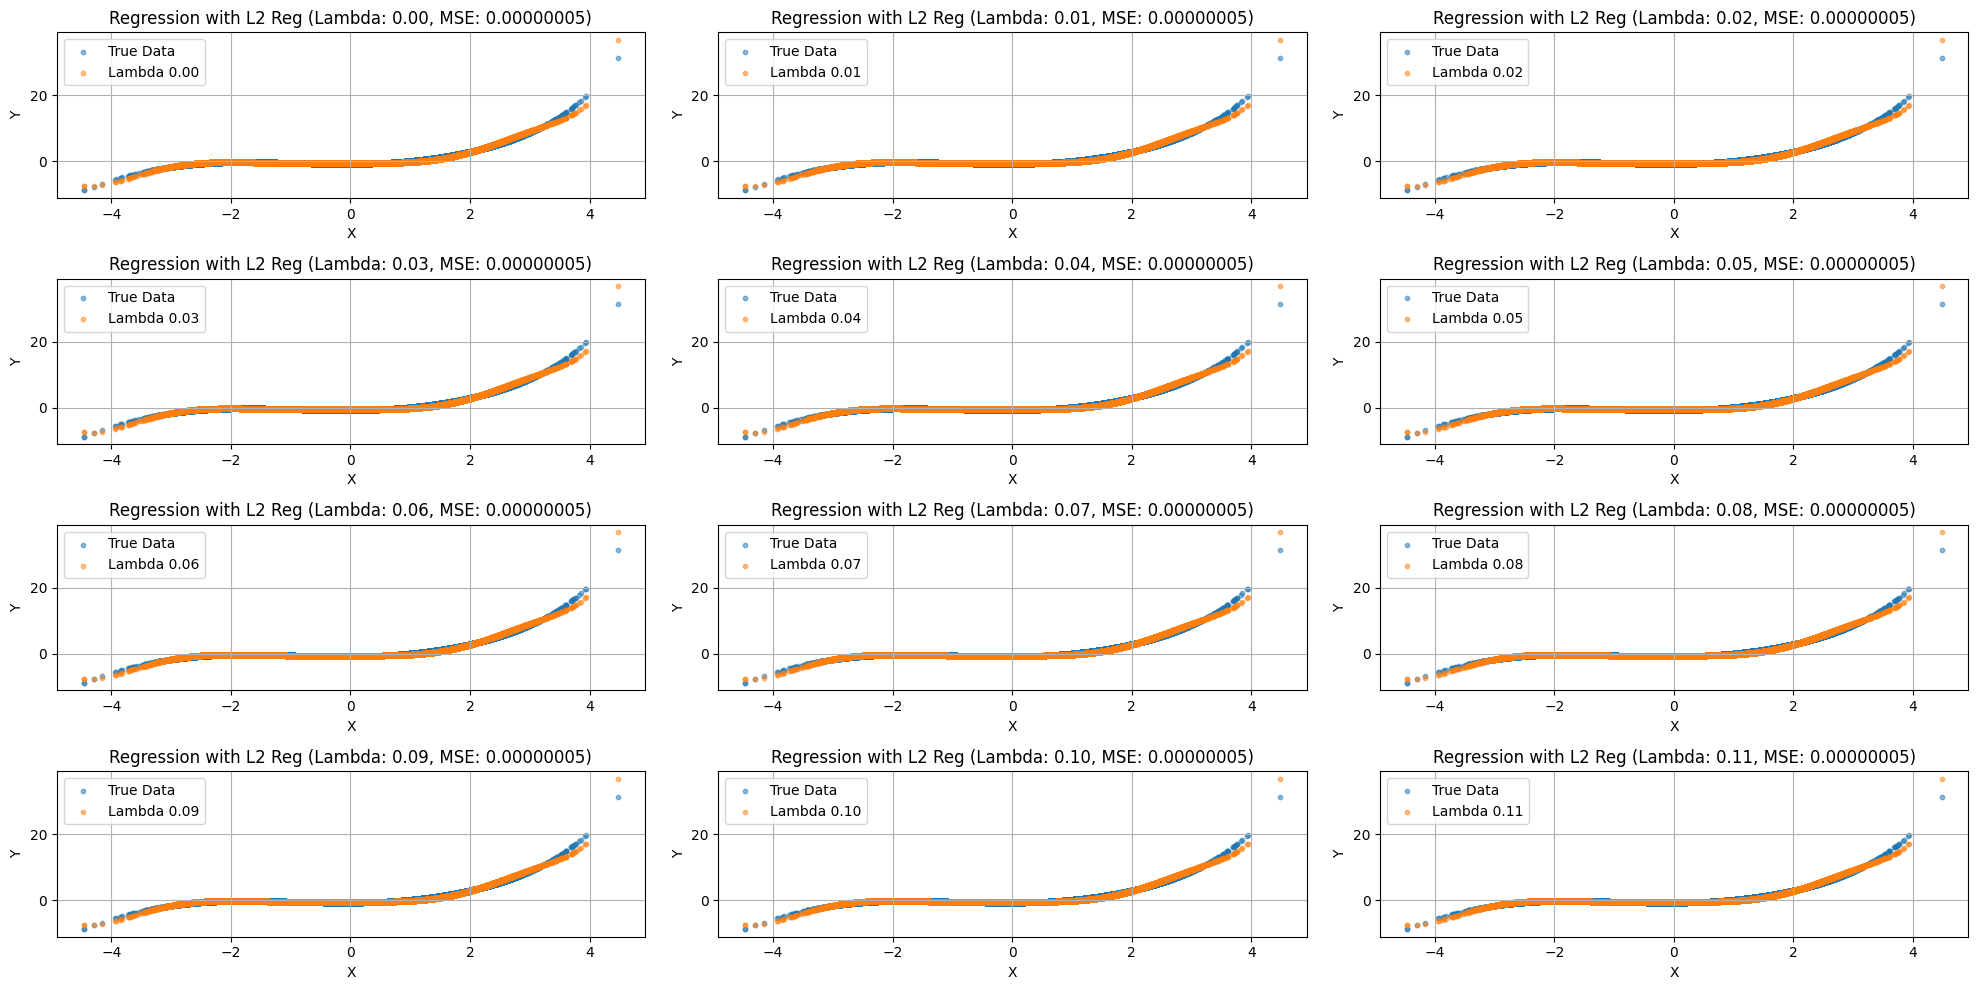

In [15]:
fig, axes = plt.subplots(4, 3, figsize=(20, 10))
axes = axes.flatten()

for idx, lam in enumerate(range(0, 12)):
    lam = 0.01 * lam
    ridge_reg = make_pipeline(PolynomialFeatures(degree=poly_degree), Ridge(alpha=0.1))
    ridge_reg.fit(x, y)

    y_ridge = ridge_reg.predict(x)
    error = np.mean((y.ravel() - y_ridge) ** 2)

    ax = axes[idx]
    ax.scatter(x, y, s=10, label="True Data", alpha=0.5)
    ax.scatter(x, y_lasso, s=10, label=f"Lambda {lam:.2f}", alpha=0.5)
    ax.set_title(f"Regression with L2 Reg (Lambda: {lam:.2f}, MSE: {error:.8f})")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()